<a href="https://colab.research.google.com/github/FathimaNazarudeen/depression-prediction-ml/blob/main/depression_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Depression Prediction

## Objective
To identify the best machine learning model for predicting depression based on health and lifestyle features.


In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE,RandomOverSampler
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('/content/depression_data.csv')
df

,Age (4 levels),Gender,Field of study,Year of university,Learning disabilities,Difficulty memorizing lessons,Professional objective,Informed about opportunities,Satisfied with living conditions,Living with a partner/child,...,Abnormal urinalysis,Vaccination up to date,Control examination needed,Panic attack symptoms,Depression,Cigarette smoker (5 levels),Drinker (3 levels),Binge drinking,Marijuana use,Other recreational drugs
0,20 and more,female,humanities,second,no,no,yes,yes,yes,no,...,yes,NaN,yes,no,no,no,no,no,no,no
1,19,female,humanities,second,no,no,yes,yes,yes,no,...,yes,NaN,no,no,no,regularly,occasionally,no,no,no
2,20 and more,female,humanities,second,no,no,yes,yes,yes,no,...,no,NaN,no,no,yes,no,occasionally,no,no,no
3,19,female,humanities,second,no,no,yes,yes,yes,no,...,yes,NaN,no,no,no,no,occasionally,no,no,no
4,18,female,humanities,second,no,no,yes,yes,yes,no,...,yes,yes,no,no,no,no,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4179,19,male,humanities,first,no,no,yes,yes,yes,no,...,no,yes,no,no,no,no,occasionally,no,no,no
4180,18,male,humanities,first,no,no,no,yes,yes,no,...,no,yes,no,no,no,no,no,no,no,no
4181,19,female,humanities,first,no,no,yes,yes,yes,no,...,no,yes,no,no,no,no,occasionally,no,no,no
4182,20 and more,male,humanities,first,no,no,no,no,no,no,...,no,yes,no,no,no,no,occasionally,no,yes,no


## Dataset Description
This dataset includes health, lifestyle, and demographic attributes like smoking habits, alcohol use, physical activity, age, height, and weight. The target variable is 'Depression' (binary classification).


In [ ]:
df.dtypes

,0
Age (4 levels),object
Gender,object
Field of study,object
Year of university,object
Learning disabilities,object
Difficulty memorizing lessons,object
Professional objective,object
Informed about opportunities,object
Satisfied with living conditions,object
Living with a partner/child,object


In [ ]:
df.isnull().sum()

,0
Age (4 levels),0
Gender,0
Field of study,0
Year of university,0
Learning disabilities,0
Difficulty memorizing lessons,0
Professional objective,0
Informed about opportunities,0
Satisfied with living conditions,514
Living with a partner/child,0


In [ ]:
df['Satisfied with living conditions'].value_counts()

,count
Satisfied with living conditions,
yes,3483
no,187


In [ ]:
df['Parental home'].value_counts()

,count
Parental home,
yes,1954
no,1516


In [ ]:
df['Having only one parent'].value_counts()

,count
Having only one parent,
no,2773
yes,1351


In [ ]:
df['Mode of transportation'].value_counts()

,count
Mode of transportation,
by public transportation,1597
by car,744
on foot,723


In [ ]:
df['Private health insurance '].value_counts()

,count
Private health insurance,
yes,3524
no,658


In [ ]:
df['Vaccination up to date'].value_counts()

,count
Vaccination up to date,
yes,2538
no,575


In [ ]:
df['Heart rate (bpm)'].value_counts()

,count
Heart rate (bpm),
80.0,706
70.0,318
60.0,223
72.0,170
68.0,170
...,...
44.0,1
124.0,1
47.0,1


## Exploratory Data Analysis (EDA)
The following section explores relationships between features and the depression label using visualizations.


<Axes: xlabel='Depression', ylabel='Physical activity(3 levels)'>

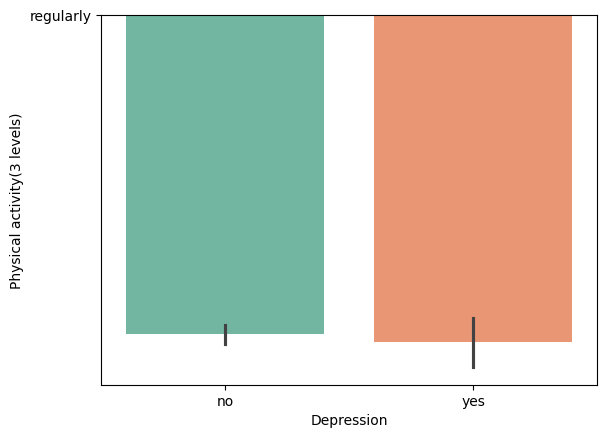

In [ ]:
sns.barplot(x='Depression', y='Physical activity(3 levels)', data=df, palette='Set2')

In [ ]:
# The bar plot shows that individuals without depression tend to have slightly higher levels of physical activity
# compared to those with depression.


<Axes: xlabel='Depression', ylabel='Weight (kg)'>

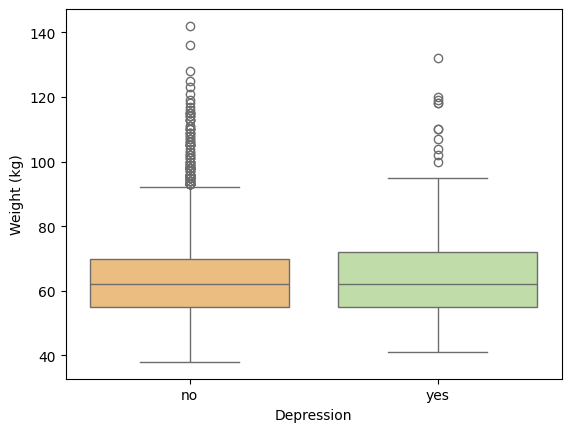

In [ ]:
sns.boxplot(x='Depression',y='Weight (kg)',data=df,palette='Spectral')

In [ ]:
#The distribution of weight is similar across both groups.
#outliers are more frequent in the non-depressed group.

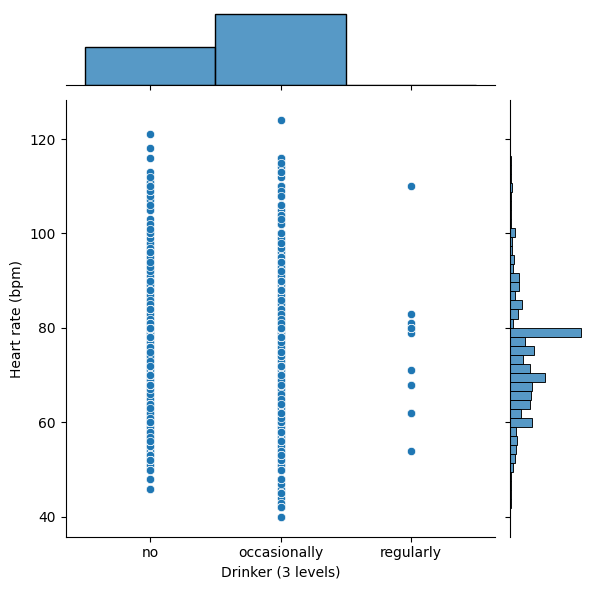

In [ ]:
sns.jointplot(x='Drinker (3 levels)',y='Heart rate (bpm)',data=df)

In [ ]:
#Most are occasional drinkers, followed by non-drinkers  and then regular drinkers
#Heart rates for all categories ranges between 60 and 120 bpm, though some outliers exist.
#Regular drinkers show more variability in heart rate

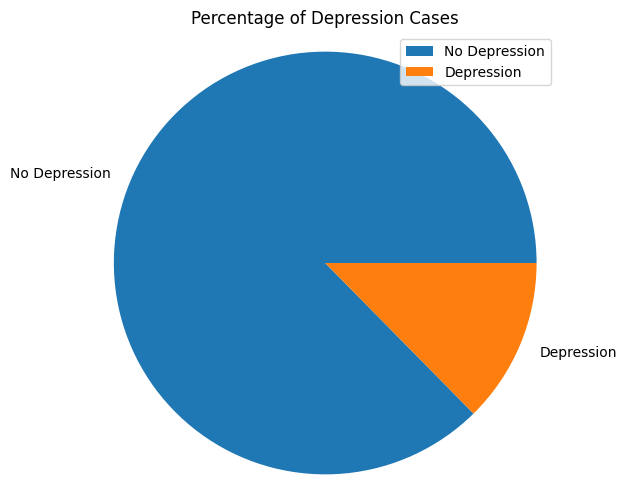

In [ ]:
depression_counts = df['Depression'].value_counts()
labels = ['No Depression', 'Depression']
plt.figure(figsize=(6, 6))
plt.pie(depression_counts,
        labels=labels)
plt.legend()

plt.title('Percentage of Depression Cases')
plt.axis('equal')
plt.show()

In [ ]:

#This highlights a class imbalance in the dataset

Text(0.5, 1.0, 'Smoking Behavior and Depression')

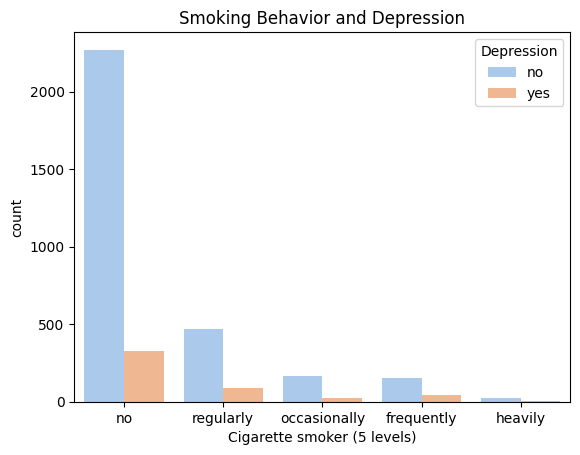

In [ ]:
sns.countplot(x='Cigarette smoker (5 levels)', hue='Depression', data=df, palette='pastel')
plt.title("Smoking Behavior and Depression")




In [ ]:
# Depression is significantly lower among non-smokers.
# In general, as smoking frequency increases (regularly, occasionally, frequently),
# the proportion of individuals with depression also increases.
# However, in the 'heavily' smoking category, no depression cases are observed,
# possibly due to a very small sample size in that group.

Text(0.5, 1.0, 'Living Satisfaction and Depression')

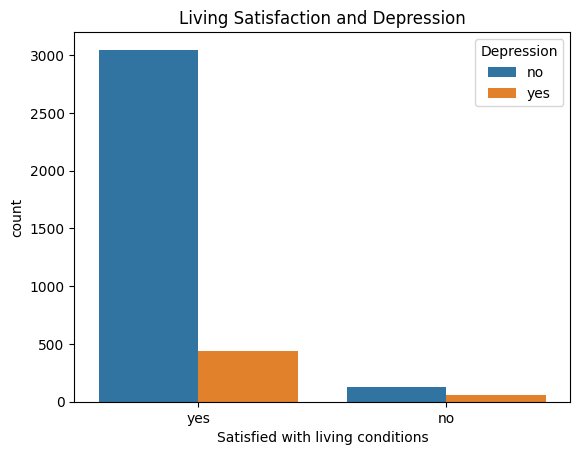

In [ ]:
sns.countplot(x='Satisfied with living conditions', hue='Depression', data=df)
plt.title("Living Satisfaction and Depression")


In [ ]:
#Individuals who are satisfied with their living conditions report significantly fewer cases of depression.
# Most of the satisfied group do not have depression, while a smaller portion does.
# On the other hand, among those not satisfied with their living conditions,
# the count of depression cases is closer to the number of non-depression cases.
# This suggests that dissatisfaction with living conditions may be linked to a higher likelihood of depression.


# Filling missing values

In [ ]:
fill=['Weight (kg)','Height (cm)','Systolic blood pressure (mmHg)','Diastolic blood pressure (mmHg)','Heart rate (bpm)']
for i in fill:
  df[i]=df[i].fillna(df[i].median())

fill_mode=['Satisfied with living conditions','Parental home','Having only one parent','Mode of transportation','Private health insurance ','Overweight and obesity','Prehypertension or hypertension','Abnormal heart rate','Vaccination up to date','Cigarette smoker (5 levels)','Drinker (3 levels)','Marijuana use'
,'Other recreational drugs']
for i in fill_mode:
  df[i]=df[i].fillna(df[i].mode()[0])

In [ ]:
df.isnull().sum()

,0
Age (4 levels),0
Gender,0
Field of study,0
Year of university,0
Learning disabilities,0
Difficulty memorizing lessons,0
Professional objective,0
Informed about opportunities,0
Satisfied with living conditions,0
Living with a partner/child,0


In [ ]:
enc = ["Age (4 levels)", "Gender", "Field of study", "Year of university", "Learning disabilities", "Difficulty memorizing lessons", "Professional objective", "Informed about opportunities", "Satisfied with living conditions", "Living with a partner/child", "Parental home", "Having only one parent", "At least one parent unemployed", "Siblings", "Mode of transportation", "Financial difficulties", "Grant", "Additional income", "Public health insurance ", "Private health insurance ", "Irregular rhythm of meals", "Unbalanced meals", "Eating junk food", "On a diet", "Irregular rhythm or unbalanced meals", "Physical activity(3 levels)", "Overweight and obesity", "Prehypertension or hypertension", "Abnormal heart rate", "Decreased in distant visual acuity", "Decreased in close visual acuity", "Urinalysis (glycosuria)", "Urinalysis (proteinuria)", "Urinalysis (hematuria)", "Urinalysis leukocyturia)", "Urinalysis (positive nitrite test)", "Abnormal urinalysis", "Vaccination up to date", "Control examination needed", "Panic attack symptoms", "Depression", "Cigarette smoker (5 levels)", "Drinker (3 levels)", "Binge drinking", "Marijuana use", "Other recreational drugs"]
for i in enc:
  encoder=LabelEncoder()
  df[i]=encoder.fit_transform(df[i])

In [ ]:
X=df.drop(['Depression'],axis=1)
X

,Age (4 levels),Gender,Field of study,Year of university,Learning disabilities,Difficulty memorizing lessons,Professional objective,Informed about opportunities,Satisfied with living conditions,Living with a partner/child,...,Urinalysis (positive nitrite test),Abnormal urinalysis,Vaccination up to date,Control examination needed,Panic attack symptoms,Cigarette smoker (5 levels),Drinker (3 levels),Binge drinking,Marijuana use,Other recreational drugs
0,2,0,0,1,0,0,1,1,1,0,...,0,1,1,1,0,2,0,0,0,0
1,1,0,0,1,0,0,1,1,1,0,...,0,1,1,0,0,4,1,0,0,0
2,2,0,0,1,0,0,1,1,1,0,...,0,0,1,0,0,2,1,0,0,0
3,1,0,0,1,0,0,1,1,1,0,...,0,1,1,0,0,2,1,0,0,0
4,0,0,0,1,0,0,1,1,1,0,...,0,1,1,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4179,1,1,0,0,0,0,1,1,1,0,...,0,0,1,0,0,2,1,0,0,0
4180,0,1,0,0,0,0,0,1,1,0,...,0,0,1,0,0,2,0,0,0,0
4181,1,0,0,0,0,0,1,1,1,0,...,0,0,1,0,0,2,1,0,0,0
4182,2,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,2,1,0,1,0


In [ ]:
y=df['Depression']
y

,Depression
0,0
1,0
2,1
3,0
4,0
...,...
4179,0
4180,0
4181,0
4182,0


## Model Evaluation and Comparison

We trained multiple models to classify depression, including:
- K-Nearest Neighbors
- Naive Bayes
- Decision Tree
- Support Vector Machine (SVM)
- Random Forest
- AdaBoost
- Gradient Boosting
- XGBoost

Models were evaluated using accuracy, precision, recall, and F1-score.


In [ ]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=8)

In [ ]:
rf=RandomForestClassifier(criterion='entropy',random_state=1,n_estimators=150)
sv=SVC()
knn=KNeighborsClassifier()
gnb = GaussianNB()
dt=DecisionTreeClassifier(random_state=1)
ab=AdaBoostClassifier(random_state=1)
gb=GradientBoostingClassifier(random_state=1)
xg=XGBClassifier(random_state=1)

In [ ]:
models=[rf,sv,knn,gnb,dt,ab,gb,xg]
for model in models:
  print('*'*20,model,'*'*20)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))

******************** RandomForestClassifier(criterion='entropy', n_estimators=150, random_state=1) ********************
              precision    recall  f1-score   support

           0       0.90      1.00      0.94      1122
           1       0.60      0.04      0.08       134

    accuracy                           0.89      1256
   macro avg       0.75      0.52      0.51      1256
weighted avg       0.87      0.89      0.85      1256

******************** SVC() ********************
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1122
           1       0.70      0.05      0.10       134

    accuracy                           0.90      1256
   macro avg       0.80      0.52      0.52      1256
weighted avg       0.88      0.90      0.85      1256

******************** KNeighborsClassifier() ********************
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1122
    

over sampling without feature selection

In [ ]:
os=SMOTE(random_state=1)
X_os,y_os=os.fit_resample(X_scaled,y)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_os,y_os,test_size=0.3,random_state=1)

In [ ]:
rf=RandomForestClassifier(criterion='entropy',random_state=1,n_estimators=150)
sv=SVC()
knn=KNeighborsClassifier()
gnb = GaussianNB()
dt=DecisionTreeClassifier(random_state=1)
ab=AdaBoostClassifier(random_state=1)
gb=GradientBoostingClassifier(random_state=1)
xg=XGBClassifier(random_state=1)

In [ ]:
models=[rf,sv,knn,gnb,dt,ab,gb,xg]
for model in models:
  print('*'*20,model,'*'*20)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))

******************** RandomForestClassifier(criterion='entropy', n_estimators=150, random_state=1) ********************
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1077
           1       0.99      0.88      0.94      1117

    accuracy                           0.94      2194
   macro avg       0.94      0.94      0.94      2194
weighted avg       0.94      0.94      0.94      2194

******************** SVC() ********************
              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1077
           1       0.88      0.79      0.83      1117

    accuracy                           0.84      2194
   macro avg       0.84      0.84      0.84      2194
weighted avg       0.84      0.84      0.84      2194

******************** KNeighborsClassifier() ********************
              precision    recall  f1-score   support

           0       0.99      0.62      0.77      1077
    

Feature selection

Correlation

In [ ]:
df.corr()[['Depression']].sort_values(by='Depression')

,Depression
Satisfied with living conditions,-0.112862
Parental home,-0.071407
Drinker (3 levels),-0.066421
Private health insurance,-0.041446
Heart rate (bpm),-0.034773
Year of university,-0.034374
Distant visual acuity of right eye (score /10),-0.034027
Distant visual acuity of left eye (score /10),-0.024789
Urinalysis leukocyturia),-0.023729
Abnormal urinalysis,-0.018227


In [ ]:
X.drop(['Other recreational drugs',
    'At least one parent unemployed',
    'Distant visual acuity of left eye (score /10)',
        'Marijuana use','Prehypertension or hypertension',
        'Cigarette smoker (5 levels)',
        'Urinalysis leukocyturia)',
        'Distant visual acuity of right eye (score /10)',
    'Systolic blood pressure (mmHg)',
    'Urinalysis (hematuria)',
    'Unbalanced meals',
    'Overweight and obesity',
        'Mode of transportation',
    'Gender',
    'Age (4 levels)',
    'Binge drinking',
    'Abnormal heart rate',
    'Siblings',
    'Urinalysis (glycosuria)',
    'Urinalysis (proteinuria)',
    'Urinalysis (positive nitrite test)'
],axis=1,inplace=True)


# X.drop([
#     'Other recreational drugs',
#     'At least one parent unemployed',
#     'Unbalanced meals',
#     'Weight (kg)',
#     'Additional income',
#     'Vaccination up to date',
#     'Decreased in distant visual acuity',
#     'Public health insurance ',
#     'On a diet',
#     'Diastolic blood pressure (mmHg)',
#     'Having only one parent',
#     'Irregular rhythm of meals',
#     'Grant',
#     'Irregular rhythm or unbalanced meals',
#     'Control examination needed',
#     'Gender',
#     'Living with a partner/child',
#     'Urinalysis (hematuria)',
#     'Decreased in close visual acuity',
#     'Professional objective',
#     'Mode of transportation',
#     'Physical activity(3 levels)',
#     'Abnormal urinalysis',
#     'Urinalysis leukocyturia)',
#     'Distant visual acuity of left eye (score /10)',
#     'Distant visual acuity of right eye (score /10)',
#     'Year of university',
#     'Heart rate (bpm)',
#     'Marijuana use',
#     'Prehypertension or hypertension',
#     'Private health insurance ',
#     'Cigarette smoker (5 levels)',
#     'Drinker (3 levels)',
#     'Parental home',
#     'Satisfied with living conditions',
#     'Informed about opportunities',
#     'Field of study',
#     'Height (cm)',
#     'Age (4 levels)',
#     'Binge drinking']
# ,axis=1,inplace=True)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaler=scaler.fit_transform(X)

# oversampling(SMOTE) with feature selection

In [ ]:
os=SMOTE(random_state=1)
X_os,y_os=os.fit_resample(X_scaler,y)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_os,y_os,test_size=0.3,random_state=20)

In [ ]:
rf=RandomForestClassifier(criterion='gini',random_state=20,n_estimators=150)
sv=SVC(kernel='poly')
knn=KNeighborsClassifier()
gnb = GaussianNB()
dt=DecisionTreeClassifier(random_state=1)
ab=AdaBoostClassifier(random_state=1)
gb=GradientBoostingClassifier(random_state=1)
xg=XGBClassifier(random_state=1)

In [ ]:
models=[rf,sv,knn,gnb,dt,ab,gb,xg]
for model in models:
  print('*'*20,model,'*'*20)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))

******************** RandomForestClassifier(n_estimators=150, random_state=20) ********************
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1105
           1       0.98      0.91      0.94      1089

    accuracy                           0.95      2194
   macro avg       0.95      0.95      0.95      2194
weighted avg       0.95      0.95      0.95      2194

******************** SVC(kernel='poly') ********************
              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1105
           1       0.80      0.81      0.80      1089

    accuracy                           0.80      2194
   macro avg       0.80      0.80      0.80      2194
weighted avg       0.80      0.80      0.80      2194

******************** KNeighborsClassifier() ********************
              precision    recall  f1-score   support

           0       0.97      0.67      0.79      1105
           

kbest

In [ ]:
selector = SelectKBest(score_func=chi2, k=45)
X_new = selector.fit_transform(X_os,y_os)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_new,y_os,test_size=0.3,random_state=20)

In [ ]:
rf=RandomForestClassifier(criterion='gini',random_state=20,n_estimators=300)
sv=SVC(kernel='rbf')
knn=KNeighborsClassifier()
gnb = GaussianNB()
dt=DecisionTreeClassifier(random_state=1)
ab=AdaBoostClassifier(random_state=1)
gb=GradientBoostingClassifier(random_state=1)
xg=XGBClassifier(random_state=1)

In [ ]:
models=[rf,sv,knn,gnb,dt,ab,gb,xg]
for model in models:
  print('*'*20,model,'*'*20)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))

******************** RandomForestClassifier(n_estimators=300, random_state=20) ********************
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1105
           1       0.98      0.91      0.94      1089

    accuracy                           0.95      2194
   macro avg       0.95      0.95      0.95      2194
weighted avg       0.95      0.95      0.95      2194

******************** SVC() ********************
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1105
           1       0.81      0.79      0.80      1089

    accuracy                           0.81      2194
   macro avg       0.81      0.81      0.81      2194
weighted avg       0.81      0.81      0.81      2194

******************** KNeighborsClassifier() ********************
              precision    recall  f1-score   support

           0       0.97      0.67      0.79      1105
           1       0.74 

# Random over sampling with correlation

In [ ]:
# X.drop([
#     'Systolic blood pressure (mmHg)',
#     'Urinalysis (hematuria)',
#     'Unbalanced meals',
#     'Overweight and obesity',
#     'Gender',
#     'Age (4 levels)',
#     'Binge drinking',
#     'Abnormal heart rate',
#     'Siblings',
#     'Urinalysis (glycosuria)',
#     'Urinalysis (proteinuria)',
#     'Urinalysis (positive nitrite test)'
# ],axis=1,inplace=True)

In [ ]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [ ]:
os=RandomOverSampler(random_state=1)
X_os,y_os=os.fit_resample(X_scaled,y)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_os,y_os,test_size=0.2,random_state=49)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       749
           1       0.98      1.00      0.99       714

    accuracy                           0.99      1463
   macro avg       0.99      0.99      0.99      1463
weighted avg       0.99      0.99      0.99      1463



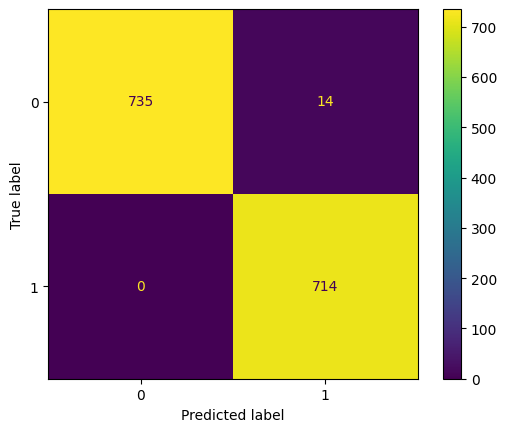

In [ ]:
rf=RandomForestClassifier(criterion='gini',random_state=20,n_estimators=300)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [ ]:
rf.score(X_train,y_train)


1.0

In [ ]:
rf.score(X_test,y_test)

0.9904306220095693

# Hyperparameter tuning

random forest

In [ ]:
# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2]
# }
# rf = RandomForestClassifier(random_state=20)
# grid_search = GridSearchCV(
#     estimator=rf,
#     param_grid=param_grid,
#     cv=5,
#     scoring='accuracy',
#     n_jobs=-1,
#     verbose=1
# )
# grid_search.fit(X_train, y_train)
# best_model = grid_search.best_estimator_

# # Accuracy on train and test sets
# train_acc = best_model.score(X_train, y_train)
# test_acc = best_model.score(X_test, y_test)

# print("Best parameters found: ", grid_search.best_params_)
# print("Train Accuracy:", train_acc)
# print("Test Accuracy:", test_acc)
# print("\nClassification Report:\n", classification_report(y_test, best_model.predict(X_test)))


decision tree

In [ ]:

param_grid = {
    'max_depth': [4, 6, 8, 10, None],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]

}


dt = DecisionTreeClassifier(random_state=1)


grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.4f}".format(grid_search.best_score_))

best_dt = grid_search.best_estimator_


Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation accuracy: 0.9121


svm

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC

# # Define parameter grid
# param_grid = {
#     'C': [0.1, 1, 1.5],             # Regularization strength
#     'degree': [2, 3, 4],                 # Degree of polynomial kernel
#     'gamma': ['scale', 'auto'],  # Kernel coefficient
#     'coef0': [0.5, 1.0]             # Independent term in poly kernel
# }

# # Instantiate the SVM model with fixed kernel and probability=True
# svm_model = SVC(kernel='poly', probability=True)

# # Set up GridSearchCV
# grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid,
#                            cv=5, scoring='accuracy', n_jobs=-1)

# # Fit to training data
# grid_search.fit(X_train, y_train)

# # Output best parameters and score
# print("Best parameters found:", grid_search.best_params_)
# print("Best cross-validation accuracy: {:.4f}".format(grid_search.best_score_))

# # Best model
# best_svm_poly = grid_search.best_estimator_


knn

In [ ]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best Cross-Validation Accuracy: 0.8791251197239222


xgb

In [ ]:
# param_grid = {
#     'n_estimators': [100, 150, 200],
#     'learning_rate': [0.05, 0.1, 0.2],
#     'max_depth': [3, 4, 5],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0]
# }

# # Setup GridSearchCV
# grid_search = GridSearchCV(
#     estimator=xgb,
#     param_grid=param_grid,
#     scoring='accuracy',
#     cv=5,
#     n_jobs=-1,
#     verbose=1
# )

# # Fit grid search
# grid_search.fit(X_train, y_train)

# # Best parameters and score
# print("Best Parameters:", grid_search.best_params_)
# print("Best Accuracy:", grid_search.best_score_)

# # Predict with the best model
# best_xgb = grid_search.best_estimator_
# y_pred = best_xgb.predict(X_test)

naive bayes

In [ ]:
# param_grid = {
#     'var_smoothing': np.logspace(-12, -6, 10)
# }

# # Setup GridSearchCV
# grid_search = GridSearchCV(
#     estimator=gnb,
#     param_grid=param_grid,
#     scoring='accuracy',  # or another metric like 'f1'
#     cv=5,
#     n_jobs=-1,
#     verbose=1
# )

# # Fit to training data
# grid_search.fit(X_train, y_train)

# # Show best params and score
# print("Best Parameters:", grid_search.best_params_)
# print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# # Use best estimator for predictions
# best_gnb = grid_search.best_estimator_
# y_pred = best_gnb.predict(X_test)

adaboost

In [ ]:
# param_grid = {
#     'n_estimators': [50, 100, 150, 200],
#     'learning_rate': [0.01, 0.1, 0.5, 0.8, 1.0],
#     # Optionally, tune base_estimator depth
#     'base_estimator': [DecisionTreeClassifier(max_depth=d) for d in [1, 2, 3]]
# }

# # Setup GridSearchCV
# grid_search = GridSearchCV(
#     estimator=adb,
#     param_grid=param_grid,
#     scoring='accuracy',  # Or another metric like 'f1'
#     cv=5,
#     n_jobs=-1,
#     verbose=1
# )

# # Fit to training data
# grid_search.fit(X_train, y_train)

# # Best parameters and score
# print("Best Parameters:", grid_search.best_params_)
# print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# # Use best estimator for prediction
# best_adb = grid_search.best_estimator_
# y_pred = best_adb.predict(X_test)

gradient boost

In [ ]:
# param_grid = {
#     'n_estimators': [100, 150, 200],
#     'learning_rate': [0.05, 0.1, 0.2],
#     'max_depth': [3, 4, 5],
#     'subsample': [0.6, 0.8, 1.0],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Setup GridSearchCV
# grid_search = GridSearchCV(
#     estimator=gb,
#     param_grid=param_grid,
#     scoring='accuracy',  # Or other metric like 'f1'
#     cv=5,
#     n_jobs=-1,
#     verbose=1
# )

# # Fit the model
# grid_search.fit(X_train, y_train)

# # Best parameters and score
# print("Best Parameters:", grid_search.best_params_)
# print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# # Best estimator for prediction
# best_gb = grid_search.best_estimator_
# y_pred = best_gb.predict(X_test)

In [ ]:
random_state=1

# Stacking

In [ ]:
# Define base learners
base_learners = [
    ('rf', RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200)),
    ('svm', SVC(kernel='poly')),
    ('knn', KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')),
    ('gnb', GaussianNB()),
    ('dt', DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=1)),
    ('ab', AdaBoostClassifier(random_state=1)),
    ('gb', GradientBoostingClassifier(random_state=1)),
    ('xgb', XGBClassifier(random_state=1))
]




final_estimator = LogisticRegression()

# Create the stacking classifier
stacking_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=final_estimator,
    cv=5,
    n_jobs=-1,
    passthrough=False
)


stacking_model.fit(X_train, y_train)

y_pred = stacking_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       749
           1       1.00      1.00      1.00       714

    accuracy                           1.00      1463
   macro avg       1.00      1.00      1.00      1463
weighted avg       1.00      1.00      1.00      1463



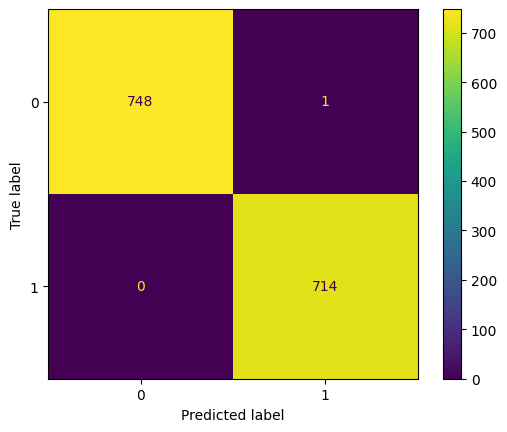

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred))

In [ ]:
stacking_model.score(X_train,y_train)


1.0

In [ ]:
stacking_model.score(X_test,y_test)

0.9993164730006835

In [ ]:
model_accuracies = {}

# Evaluate each base learner
for name, model in base_learners:
    model.fit(X_train, y_train)
    y_pred_base = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred_base)
    model_accuracies[name] = acc

# Evaluate stacking model (already trained)
y_pred_stack = stacking_model.predict(X_test)
model_accuracies['stacking'] = accuracy_score(y_test, y_pred_stack)

# Print the accuracies
for model_name, accuracy in model_accuracies.items():
    print(f"{model_name}: {accuracy:.4f}")

rf: 0.9891
svm: 0.7697
knn: 0.8906
gnb: 0.6152
dt: 0.9248
ab: 0.6152
gb: 0.7362
xgb: 0.9269
stacking: 0.9993


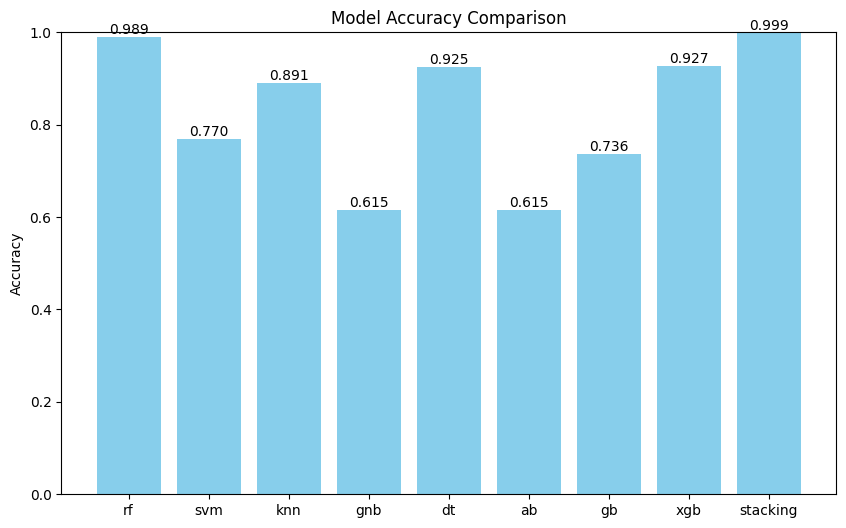

In [ ]:
# Plotting
plt.figure(figsize=(10,6))
names = list(model_accuracies.keys())
scores = list(model_accuracies.values())

bars = plt.bar(names, scores, color='skyblue')
plt.ylim([0,1])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

# Adding value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}', ha='center', va='bottom')

plt.show()


### Conclusion

The stacking ensemble model, which combines the predictive strengths of multiple base classifiers such as Random Forest, SVM, KNN, Naive Bayes, Decision Tree, AdaBoost, Gradient Boosting, and XGBoost, achieved the highest accuracy compared to all individual models.

This performance boost highlights the effectiveness of stacking in leveraging the diverse strengths of different algorithms. By combining both simple and complex models and using a logistic regression meta-learner, the ensemble was able to generalize better and reduce bias and variance.

In conclusion, stacking proved to be the most robust approach for this classification problem, making it the recommended choice for deployment or further model optimization.